In [1]:
# https://mypoeticside.com/poets/edgar-allan-poe-poems
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from tqdm import tqdm
import torch.optim as optim
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ralampay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ralampay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
filename = "edgar-allan-poe.txt"
f = open(filename, 'r')

raw_text = f.read()

raw_text

"In visions of the dark night\nI have dreamed of joy departed-\nBut a waking dream of life and light\nHath left me broken-hearted.\n\nAh! what is not a dream by day\nTo him whose eyes are cast\nOn things around him with a ray\nTurned back upon the past?\n\nThat holy dream- that holy dream,\nWhile all the world were chiding,\nHath cheered me as a lovely beam\nA lonely spirit guiding.\n\nWhat though that light, thro' storm and night,\nSo trembled from afar-\nWhat could there be more purely bright\nIn Truth's day-star?\n\nFrom childhood's hour I have not been\nAs others were; I have not seen\nAs others saw; I could not bring\nMy passions from a common spring.\nFrom the same source I have not taken\nMy sorrow; I could not awaken\nMy heart to joy at the same tone;\nAnd all I loved, I loved alone.\nThen- in my childhood, in the dawn\nOf a most stormy life- was drawn\nFrom every depth of good and ill\nThe mystery which binds me still:\nFrom the torrent, or the fountain,\nFrom the red cliff of

In [3]:
processed_text = re.sub(r'[^\x00-\x7f]', r'', raw_text)

processed_text

"In visions of the dark night\nI have dreamed of joy departed-\nBut a waking dream of life and light\nHath left me broken-hearted.\n\nAh! what is not a dream by day\nTo him whose eyes are cast\nOn things around him with a ray\nTurned back upon the past?\n\nThat holy dream- that holy dream,\nWhile all the world were chiding,\nHath cheered me as a lovely beam\nA lonely spirit guiding.\n\nWhat though that light, thro' storm and night,\nSo trembled from afar-\nWhat could there be more purely bright\nIn Truth's day-star?\n\nFrom childhood's hour I have not been\nAs others were; I have not seen\nAs others saw; I could not bring\nMy passions from a common spring.\nFrom the same source I have not taken\nMy sorrow; I could not awaken\nMy heart to joy at the same tone;\nAnd all I loved, I loved alone.\nThen- in my childhood, in the dawn\nOf a most stormy life- was drawn\nFrom every depth of good and ill\nThe mystery which binds me still:\nFrom the torrent, or the fountain,\nFrom the red cliff of

In [4]:
word_tokens = word_tokenize(processed_text)

len(word_tokens)

585

In [5]:
unique_words = sorted(list(set(word_tokens)))

len(unique_words)

272

In [6]:
unique_words

['!',
 "'",
 "'T",
 "'Twere",
 "'d",
 "'s",
 "'t",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'A',
 'Ah',
 'And',
 'As',
 'But',
 'Came',
 'Continuing-',
 'Dreams',
 'Eternity',
 'For',
 'From',
 'Hath',
 'Heaven',
 'Hope',
 'I',
 'In',
 'Its',
 'Love-',
 'My',
 'Of',
 'Oh',
 'On',
 'Or',
 'Paradise',
 'Shone',
 'So',
 'Than',
 'That',
 'The',
 'Then-',
 'To',
 'Too',
 'Truth',
 'Turned',
 'What',
 'When',
 'While',
 'Yes',
 'a',
 'afar-',
 'all',
 'alone',
 'an',
 'and',
 'apart',
 'are',
 'around',
 'as',
 'at',
 'autumn',
 'awaken',
 'awakening',
 'back',
 'be',
 'be-',
 'beam',
 'been',
 'behind',
 'beings',
 'better',
 'binds',
 'birth',
 'blue',
 'bound',
 'boyhood-',
 'bright',
 'bring',
 'brings',
 'broken-hearted',
 'by',
 'cast',
 'chaos',
 'cheered',
 'chiding',
 'childhood',
 'chilly',
 'cliff',
 'climes',
 'cloud',
 'cold',
 'coldly-',
 'coloring',
 'common',
 'could',
 'dark',
 'dawn',
 'day',
 'day-star',
 'deep',
 'delirious',
 'demon',
 'departed-',
 'depth',
 'd

In [7]:
word_vocabulary = unique_words

indices_words = dict((index, word) for index, word in enumerate(word_vocabulary))

indices_words

{0: '!',
 1: "'",
 2: "'T",
 3: "'Twere",
 4: "'d",
 5: "'s",
 6: "'t",
 7: '(',
 8: ')',
 9: ',',
 10: '-',
 11: '.',
 12: ':',
 13: ';',
 14: '?',
 15: 'A',
 16: 'Ah',
 17: 'And',
 18: 'As',
 19: 'But',
 20: 'Came',
 21: 'Continuing-',
 22: 'Dreams',
 23: 'Eternity',
 24: 'For',
 25: 'From',
 26: 'Hath',
 27: 'Heaven',
 28: 'Hope',
 29: 'I',
 30: 'In',
 31: 'Its',
 32: 'Love-',
 33: 'My',
 34: 'Of',
 35: 'Oh',
 36: 'On',
 37: 'Or',
 38: 'Paradise',
 39: 'Shone',
 40: 'So',
 41: 'Than',
 42: 'That',
 43: 'The',
 44: 'Then-',
 45: 'To',
 46: 'Too',
 47: 'Truth',
 48: 'Turned',
 49: 'What',
 50: 'When',
 51: 'While',
 52: 'Yes',
 53: 'a',
 54: 'afar-',
 55: 'all',
 56: 'alone',
 57: 'an',
 58: 'and',
 59: 'apart',
 60: 'are',
 61: 'around',
 62: 'as',
 63: 'at',
 64: 'autumn',
 65: 'awaken',
 66: 'awakening',
 67: 'back',
 68: 'be',
 69: 'be-',
 70: 'beam',
 71: 'been',
 72: 'behind',
 73: 'beings',
 74: 'better',
 75: 'binds',
 76: 'birth',
 77: 'blue',
 78: 'bound',
 79: 'boyhood-',
 

In [8]:
word_indices = dict((word, index) for index, word in enumerate(word_vocabulary))

word_indices

{'!': 0,
 "'": 1,
 "'T": 2,
 "'Twere": 3,
 "'d": 4,
 "'s": 5,
 "'t": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 ':': 12,
 ';': 13,
 '?': 14,
 'A': 15,
 'Ah': 16,
 'And': 17,
 'As': 18,
 'But': 19,
 'Came': 20,
 'Continuing-': 21,
 'Dreams': 22,
 'Eternity': 23,
 'For': 24,
 'From': 25,
 'Hath': 26,
 'Heaven': 27,
 'Hope': 28,
 'I': 29,
 'In': 30,
 'Its': 31,
 'Love-': 32,
 'My': 33,
 'Of': 34,
 'Oh': 35,
 'On': 36,
 'Or': 37,
 'Paradise': 38,
 'Shone': 39,
 'So': 40,
 'Than': 41,
 'That': 42,
 'The': 43,
 'Then-': 44,
 'To': 45,
 'Too': 46,
 'Truth': 47,
 'Turned': 48,
 'What': 49,
 'When': 50,
 'While': 51,
 'Yes': 52,
 'a': 53,
 'afar-': 54,
 'all': 55,
 'alone': 56,
 'an': 57,
 'and': 58,
 'apart': 59,
 'are': 60,
 'around': 61,
 'as': 62,
 'at': 63,
 'autumn': 64,
 'awaken': 65,
 'awakening': 66,
 'back': 67,
 'be': 68,
 'be-': 69,
 'beam': 70,
 'been': 71,
 'behind': 72,
 'beings': 73,
 'better': 74,
 'binds': 75,
 'birth': 76,
 'blue': 77,
 'bound': 78,
 'boyhood-': 79,
 

In [9]:
block_size = 3
step = 1

x = []
y = []

for i in range(0, len(word_tokens) - block_size, step):
    x.append(word_tokens[i: i+block_size])
    y.append(word_tokens[i + block_size])

In [10]:
x

[['In', 'visions', 'of'],
 ['visions', 'of', 'the'],
 ['of', 'the', 'dark'],
 ['the', 'dark', 'night'],
 ['dark', 'night', 'I'],
 ['night', 'I', 'have'],
 ['I', 'have', 'dreamed'],
 ['have', 'dreamed', 'of'],
 ['dreamed', 'of', 'joy'],
 ['of', 'joy', 'departed-'],
 ['joy', 'departed-', 'But'],
 ['departed-', 'But', 'a'],
 ['But', 'a', 'waking'],
 ['a', 'waking', 'dream'],
 ['waking', 'dream', 'of'],
 ['dream', 'of', 'life'],
 ['of', 'life', 'and'],
 ['life', 'and', 'light'],
 ['and', 'light', 'Hath'],
 ['light', 'Hath', 'left'],
 ['Hath', 'left', 'me'],
 ['left', 'me', 'broken-hearted'],
 ['me', 'broken-hearted', '.'],
 ['broken-hearted', '.', 'Ah'],
 ['.', 'Ah', '!'],
 ['Ah', '!', 'what'],
 ['!', 'what', 'is'],
 ['what', 'is', 'not'],
 ['is', 'not', 'a'],
 ['not', 'a', 'dream'],
 ['a', 'dream', 'by'],
 ['dream', 'by', 'day'],
 ['by', 'day', 'To'],
 ['day', 'To', 'him'],
 ['To', 'him', 'whose'],
 ['him', 'whose', 'eyes'],
 ['whose', 'eyes', 'are'],
 ['eyes', 'are', 'cast'],
 ['are', 'c

In [11]:
y

['the',
 'dark',
 'night',
 'I',
 'have',
 'dreamed',
 'of',
 'joy',
 'departed-',
 'But',
 'a',
 'waking',
 'dream',
 'of',
 'life',
 'and',
 'light',
 'Hath',
 'left',
 'me',
 'broken-hearted',
 '.',
 'Ah',
 '!',
 'what',
 'is',
 'not',
 'a',
 'dream',
 'by',
 'day',
 'To',
 'him',
 'whose',
 'eyes',
 'are',
 'cast',
 'On',
 'things',
 'around',
 'him',
 'with',
 'a',
 'ray',
 'Turned',
 'back',
 'upon',
 'the',
 'past',
 '?',
 'That',
 'holy',
 'dream-',
 'that',
 'holy',
 'dream',
 ',',
 'While',
 'all',
 'the',
 'world',
 'were',
 'chiding',
 ',',
 'Hath',
 'cheered',
 'me',
 'as',
 'a',
 'lovely',
 'beam',
 'A',
 'lonely',
 'spirit',
 'guiding',
 '.',
 'What',
 'though',
 'that',
 'light',
 ',',
 'thro',
 "'",
 'storm',
 'and',
 'night',
 ',',
 'So',
 'trembled',
 'from',
 'afar-',
 'What',
 'could',
 'there',
 'be',
 'more',
 'purely',
 'bright',
 'In',
 'Truth',
 "'s",
 'day-star',
 '?',
 'From',
 'childhood',
 "'s",
 'hour',
 'I',
 'have',
 'not',
 'been',
 'As',
 'others',
 '

In [12]:
y_ints = [word_indices[item] for item in y]

y_ints

[237,
 99,
 181,
 29,
 133,
 111,
 186,
 152,
 106,
 19,
 53,
 260,
 109,
 186,
 157,
 58,
 159,
 26,
 155,
 169,
 83,
 11,
 16,
 0,
 263,
 149,
 184,
 53,
 109,
 84,
 101,
 45,
 137,
 266,
 117,
 60,
 85,
 36,
 241,
 61,
 137,
 269,
 53,
 202,
 48,
 67,
 255,
 237,
 199,
 14,
 42,
 139,
 110,
 236,
 139,
 109,
 9,
 51,
 55,
 237,
 270,
 262,
 88,
 9,
 26,
 87,
 169,
 62,
 53,
 168,
 70,
 15,
 163,
 223,
 128,
 11,
 49,
 243,
 236,
 159,
 9,
 245,
 1,
 228,
 58,
 181,
 9,
 40,
 254,
 124,
 54,
 49,
 98,
 240,
 68,
 174,
 201,
 80,
 30,
 47,
 5,
 102,
 14,
 25,
 89,
 5,
 143,
 29,
 133,
 184,
 71,
 18,
 191,
 262,
 13,
 29,
 133,
 184,
 212,
 18,
 191,
 211,
 13,
 29,
 98,
 184,
 81,
 33,
 198,
 124,
 53,
 97,
 225,
 11,
 25,
 237,
 210,
 221,
 29,
 133,
 184,
 234,
 33,
 220,
 13,
 29,
 98,
 184,
 65,
 33,
 134,
 250,
 152,
 63,
 237,
 210,
 251,
 13,
 17,
 55,
 29,
 166,
 9,
 29,
 166,
 56,
 11,
 44,
 148,
 179,
 89,
 9,
 148,
 237,
 100,
 34,
 53,
 176,
 229,
 158,
 261,
 108,
 25,
 

In [13]:
y_encoded = []

for item in y_ints:
    y_vector = np.zeros(len(unique_words))
    y_vector[item] = 1
    y_encoded.append(y_vector)

y_encoded = np.array(y_encoded)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
x_encoded = []

for x_arr in x:
    x_ints = [word_indices[item] for item in x_arr]
    
    x_row = []
    for item in x_ints:
        x_vector = np.zeros(len(unique_words))
        x_vector[item] = 1
        x_row.append(x_vector)
        
    x_encoded.append(x_row)
    
x_encoded = np.array(x_encoded)

x_encoded

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
class EdgarAllanPoeAI(nn.Module):
    def __init__(self, input_dim, output_dim, block_size):
        super().__init__()

        self.embeddings = nn.Linear(input_dim, 30 * block_size)
        self.hidden = nn.Linear(30 * block_size, 50)
        self.output = nn.Linear(50, output_dim)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # f(x) = a(f(x))
        x = self.relu(self.embeddings(x))
        x = self.relu(self.hidden(x))
        y = self.sigmoid(self.output(x))
        y = self.softmax(y)

        return y

In [16]:
input_size = x_encoded[0].ravel().shape[0]

input_size

816

In [17]:
model = EdgarAllanPoeAI(input_size, len(unique_words), block_size)

model

EdgarAllanPoeAI(
  (embeddings): Linear(in_features=816, out_features=90, bias=True)
  (hidden): Linear(in_features=90, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=272, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [18]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index].ravel(), self.y[index]
    
    def __len__(self):
        return self.n_samples


In [19]:
device = 'cpu'
x = torch.tensor(x_encoded).float().to(device)
y = torch.tensor(y_encoded).float().to(device)

training_ds = CustomDataset(x, y)

training_ds

In [20]:
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

softmax = nn.Softmax(dim=1)

def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    ave_loss = 0
    count = 0 
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # Update tqdm
        loop.set_postfix(loss=loss.item())

        count += 1
        ave_loss += loss.item()
    
    ave_loss = ave_loss / count

    return ave_loss

In [22]:
epochs = 100

average_losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    ave_loss = train_fn(train_loader, model, optimizer, criterion, device)
    
    average_losses.append(ave_loss)
        
    print("Ave Loss: {}".format(ave_loss))

Epoch: 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 410.51it/s, loss=5.61]


Ave Loss: 5.6058029598659935
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 417.81it/s, loss=5.61]


Ave Loss: 5.605794882163023
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 400.00it/s, loss=5.61]


Ave Loss: 5.605788385766184
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 417.59it/s, loss=5.61]


Ave Loss: 5.605780748220591
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 428.61it/s, loss=5.61]


Ave Loss: 5.605771170722114
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 445.19it/s, loss=5.61]


Ave Loss: 5.605758222759279
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 433.18it/s, loss=5.61]


Ave Loss: 5.605739365276109
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 431.58it/s, loss=5.61]


Ave Loss: 5.605709010719234
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 451.31it/s, loss=5.61]


Ave Loss: 5.605655931000017
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 449.44it/s, loss=5.61]


Ave Loss: 5.605558440216586
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 457.10it/s, loss=5.61]


Ave Loss: 5.605390214512491
Epoch: 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 470.89it/s, loss=5.6]


Ave Loss: 5.605147846743592
Epoch: 12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 496.32it/s, loss=5.6]


Ave Loss: 5.604874443804097
Epoch: 13


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 492.22it/s, loss=5.6]


Ave Loss: 5.60463056808863
Epoch: 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 487.09it/s, loss=5.6]


Ave Loss: 5.604447931305975
Epoch: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 480.20it/s, loss=5.6]


Ave Loss: 5.604323065179026
Epoch: 16


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 506.69it/s, loss=5.6]


Ave Loss: 5.604239186670026
Epoch: 17


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 509.89it/s, loss=5.6]


Ave Loss: 5.604181668697259
Epoch: 18


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 483.62it/s, loss=5.6]


Ave Loss: 5.604140701456966
Epoch: 19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 499.38it/s, loss=5.6]


Ave Loss: 5.604110350975623
Epoch: 20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 516.42it/s, loss=5.6]


Ave Loss: 5.604087136749529
Epoch: 21


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 465.87it/s, loss=5.6]


Ave Loss: 5.604068442287608
Epoch: 22


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 519.24it/s, loss=5.6]


Ave Loss: 5.60405293896667
Epoch: 23


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 532.71it/s, loss=5.6]


Ave Loss: 5.604039713867709
Epoch: 24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 524.51it/s, loss=5.6]


Ave Loss: 5.60402800486638
Epoch: 25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 493.38it/s, loss=5.6]


Ave Loss: 5.604017530751024
Epoch: 26


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 518.43it/s, loss=5.6]


Ave Loss: 5.6040077454004535
Epoch: 27


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 502.64it/s, loss=5.6]


Ave Loss: 5.603998530624259
Epoch: 28


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 514.31it/s, loss=5.6]


Ave Loss: 5.603989674494817
Epoch: 29


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 494.02it/s, loss=5.6]


Ave Loss: 5.603981181087657
Epoch: 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 532.23it/s, loss=5.6]


Ave Loss: 5.603972907759186
Epoch: 31


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 513.62it/s, loss=5.6]


Ave Loss: 5.603964936020028
Epoch: 32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 479.22it/s, loss=5.6]


Ave Loss: 5.60395715583084
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 522.73it/s, loss=5.6]


Ave Loss: 5.603949408245902
Epoch: 34


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 494.41it/s, loss=5.6]


Ave Loss: 5.603941844059871
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 523.30it/s, loss=5.6]


Ave Loss: 5.6039342187408705
Epoch: 36


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 499.54it/s, loss=5.6]


Ave Loss: 5.603926487458058
Epoch: 37


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 529.00it/s, loss=5.6]


Ave Loss: 5.603918690966744
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 525.89it/s, loss=5.6]


Ave Loss: 5.6039107599829
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 492.87it/s, loss=5.6]


Ave Loss: 5.603902551862928
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 475.22it/s, loss=5.6]


Ave Loss: 5.603894323365301
Epoch: 41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 488.36it/s, loss=5.6]


Ave Loss: 5.603885813656016
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 483.50it/s, loss=5.6]


Ave Loss: 5.603877096094637
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 475.03it/s, loss=5.6]


Ave Loss: 5.603868191058819
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 491.85it/s, loss=5.6]


Ave Loss: 5.603859171908126
Epoch: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 509.48it/s, loss=5.6]


Ave Loss: 5.603849940829807
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 507.36it/s, loss=5.6]


Ave Loss: 5.603840416313236
Epoch: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 494.62it/s, loss=5.6]


Ave Loss: 5.603830361977602
Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 512.80it/s, loss=5.6]


Ave Loss: 5.603820164998372
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 476.64it/s, loss=5.6]


Ave Loss: 5.6038096786564235
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 485.49it/s, loss=5.6]


Ave Loss: 5.603799061897473
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 473.39it/s, loss=5.6]


Ave Loss: 5.603788355476836
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 471.45it/s, loss=5.6]


Ave Loss: 5.603777355617947
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 498.40it/s, loss=5.6]


Ave Loss: 5.603766355759058
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 443.99it/s, loss=5.6]


Ave Loss: 5.603755115443825
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 447.05it/s, loss=5.6]


Ave Loss: 5.603743655049903
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 472.19it/s, loss=5.6]


Ave Loss: 5.6037319175198546
Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 492.67it/s, loss=5.6]


Ave Loss: 5.6037199599111185
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 483.54it/s, loss=5.6]


Ave Loss: 5.60370780260135
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 511.03it/s, loss=5.6]


Ave Loss: 5.603695266267174
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 507.90it/s, loss=5.6]


Ave Loss: 5.603682424268152
Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 458.74it/s, loss=5.6]


Ave Loss: 5.603669325510661
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 456.57it/s, loss=5.6]


Ave Loss: 5.603655823275575
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 451.43it/s, loss=5.6]


Ave Loss: 5.603642158019237
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 453.67it/s, loss=5.6]


Ave Loss: 5.603628024076804
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 473.48it/s, loss=5.6]


Ave Loss: 5.603613539638682
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 437.61it/s, loss=5.6]


Ave Loss: 5.603598672100621
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 461.29it/s, loss=5.6]


Ave Loss: 5.6035835559551535
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 444.26it/s, loss=5.6]


Ave Loss: 5.603567979274652
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 477.29it/s, loss=5.6]


Ave Loss: 5.603552084702712
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 445.04it/s, loss=5.6]


Ave Loss: 5.603535729595738
Epoch: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 484.31it/s, loss=5.6]


Ave Loss: 5.603518991388826
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 441.68it/s, loss=5.6]


Ave Loss: 5.603501898610694
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 480.82it/s, loss=5.6]


Ave Loss: 5.603484369750715
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 461.23it/s, loss=5.6]


Ave Loss: 5.6034662580897665
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 440.20it/s, loss=5.6]


Ave Loss: 5.603447779631003
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 474.21it/s, loss=5.6]


Ave Loss: 5.603428938449958
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 435.72it/s, loss=5.6]


Ave Loss: 5.603409591903034
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 446.21it/s, loss=5.6]


Ave Loss: 5.603390053806142
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 449.65it/s, loss=5.6]


Ave Loss: 5.60337010000506
Epoch: 80


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 447.73it/s, loss=5.6]


Ave Loss: 5.603349543025351
Epoch: 81


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 438.82it/s, loss=5.6]


Ave Loss: 5.603328774118016
Epoch: 82


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 483.56it/s, loss=5.6]


Ave Loss: 5.60330761395968
Epoch: 83


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 451.59it/s, loss=5.6]


Ave Loss: 5.603286074776935
Epoch: 84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 459.75it/s, loss=5.6]


Ave Loss: 5.6032634148230915
Epoch: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 471.12it/s, loss=5.6]


Ave Loss: 5.603240795624562
Epoch: 86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 477.93it/s, loss=5.6]


Ave Loss: 5.603218005253718
Epoch: 87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 462.29it/s, loss=5.6]


Ave Loss: 5.603194945897812
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 456.65it/s, loss=5.6]


Ave Loss: 5.603171682765341
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 442.83it/s, loss=5.6]


Ave Loss: 5.603148134345682
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 438.25it/s, loss=5.6]


Ave Loss: 5.603124410678179
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 442.56it/s, loss=5.6]


Ave Loss: 5.603100356892643
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 445.52it/s, loss=5.6]


Ave Loss: 5.6030761156326685
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 433.91it/s, loss=5.6]


Ave Loss: 5.603051491272756
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 496.45it/s, loss=5.6]


Ave Loss: 5.603026333018246
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 484.00it/s, loss=5.6]


Ave Loss: 5.603001007666955
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 454.77it/s, loss=5.6]


Ave Loss: 5.6029756089561005
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 452.33it/s, loss=5.6]


Ave Loss: 5.602949957562308
Epoch: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 442.58it/s, loss=5.6]


Ave Loss: 5.602924314319578
Epoch: 99


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:00<00:00, 472.58it/s, loss=5.6]

Ave Loss: 5.602898520282191


In [23]:
poem = ['I', 'could', 'dream']

x_ints = [word_indices[item] for item in poem]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

output

/tmp/ipykernel_12085/295436269.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()


array([0.00741447, 0.00448644, 0.00317741, 0.00333619, 0.00317741,
       0.00319642, 0.00317769, 0.00317741, 0.00317741, 0.00860224,
       0.0031814 , 0.00848466, 0.00332969, 0.00323162, 0.00390404,
       0.00334222, 0.00318196, 0.00518961, 0.00473049, 0.00332337,
       0.00317741, 0.00317741, 0.00317741, 0.00317888, 0.00317825,
       0.00846728, 0.00346476, 0.00339964, 0.00317741, 0.0085326 ,
       0.00448088, 0.00317798, 0.00317741, 0.00392485, 0.00789168,
       0.00317741, 0.00318356, 0.00317873, 0.00319615, 0.00317741,
       0.00317741, 0.00318788, 0.00340141, 0.00317901, 0.00317945,
       0.00341119, 0.00317876, 0.00317741, 0.00318648, 0.00320435,
       0.00317741, 0.00317741, 0.00317741, 0.00855562, 0.00321121,
       0.00412898, 0.00317741, 0.00317741, 0.00848106, 0.00317741,
       0.00317777, 0.00317741, 0.0032434 , 0.00317741, 0.0031781 ,
       0.00317741, 0.00317741, 0.00317741, 0.00404796, 0.00317741,
       0.00321314, 0.00841572, 0.00317787, 0.00317741, 0.00318

<BarContainer object of 272 artists>

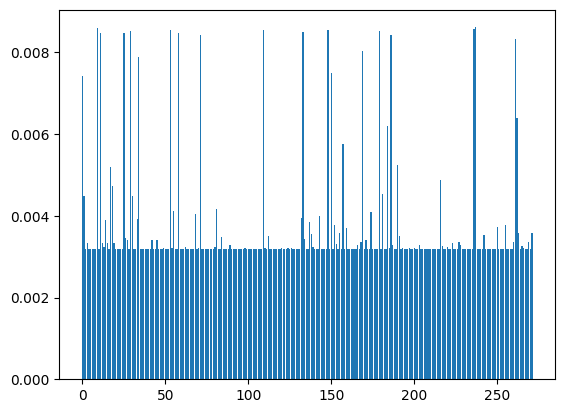

In [24]:
import matplotlib.pyplot as plt

plt.bar(range(len(output)), output)

In [25]:
index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word1 = indices_words[index]

word1

'be'

In [26]:
poem.append(word1)

In [27]:
phrase = ['could', 'dream', word1]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word2 = indices_words[index]

word2

'when'

In [28]:
poem.append(word2)

In [29]:
phrase = ['dream', word1, word2]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word3 = indices_words[index]

word3

'heart'

In [30]:
poem.append(word3)

In [31]:
phrase = [word1, word2, word3]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word4 = indices_words[index]

word4

'imagining'

In [32]:
poem.append(word4)

In [33]:
phrase = [word2, word3, word4]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word5 = indices_words[index]

word5

'dream'

In [34]:
poem.append(word5)

In [35]:
phrase = [word3, word4, word5]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word6 = indices_words[index]

word6

'happy'

In [36]:
poem.append(word6)

In [37]:
poem

['I', 'could', 'dream', 'be', 'when', 'heart', 'imagining', 'dream', 'happy']